In [1]:
# import some modules to be used in py-spark SQL
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import HiveContext

In [2]:
spark=SparkSession.builder.appName("PySpark_Testing").getOrCreate()
sc = spark.sparkContext
sqlContext = HiveContext(sc)

In [3]:
df = spark.read.json('foodscore/foodscore/data/food_details.jl')
df.head()

Row(EWG Food Reports=[["EWG's Good Food On A Tight Budget", 'https://www.ewg.org/goodfood/'], ["EWG's Shopper's Guide to Pesticide in Produce", 'https://www.ewg.org/foodnews/'], ["Children's Cereal: Sugar by the Pound", 'https://www.ewg.org/research/childrens-cereals'], ["Meat Eater's Guide to Climate Change + Health", 'https://www.ewg.org/meateatersguide/'], ["How Much is Too Much? Excess Vitamins and Minerals in Food Can Harm Kids' Health", 'https://www.ewg.org/research/how-much-is-too-much']], EWG's Top Findings=[['positive', 'Certified organic product [read more]'], ['positive', 'No ingredient concerns identified for this product [read more]'], ['positive', 'Does not contain artificial or industrial ingredients [read more]'], ['positive', 'This is one of the most nutritious vegetables for the lowest cost [read more]'], ['positive', 'Product has been classified as having no processing concerns']], Ingredient List=['GREEN KALE, RED KALE.'], Other Information=[['positive', 'This produ

In [4]:
type(df)

pyspark.sql.dataframe.DataFrame

In [20]:
df = sqlContext.read.json('foodscore/foodscore/food_details.jl')
df.head()

Row(EWG Food Reports=[["EWG's Good Food On A Tight Budget", 'https://www.ewg.org/goodfood/'], ["EWG's Shopper's Guide to Pesticide in Produce", 'https://www.ewg.org/foodnews/'], ["Children's Cereal: Sugar by the Pound", 'https://www.ewg.org/research/childrens-cereals'], ["Meat Eater's Guide to Climate Change + Health", 'https://www.ewg.org/meateatersguide/'], ["How Much is Too Much? Excess Vitamins and Minerals in Food Can Harm Kids' Health", 'https://www.ewg.org/research/how-much-is-too-much']], EWG's Top Findings=[['positive', 'Certified organic product [read more]'], ['positive', 'No ingredient concerns identified for this product [read more]'], ['positive', 'Does not contain artificial or industrial ingredients [read more]'], ['positive', 'Per gram, high in protein [read more]'], ['positive', 'Good source of naturally occurring iron [read more]'], ['positive', 'Product has been classified as having no processing concerns']], Ingredient List=['ORGANIC SOYBEANS.'], Other Information=

In [5]:
type(df)

pyspark.sql.dataframe.DataFrame

In [6]:
len(df.columns)

16

In [7]:
df.printSchema

<bound method DataFrame.printSchema of DataFrame[EWG Food Reports: array<array<string>>, EWG's Top Findings: array<array<string>>, Ingredient List: array<string>, Other Information: array<array<string>>, Selected Certifications and Seals: array<string>, calories: string, categeory: array<string>, ingredient_score: string, nutrients: struct<AVOID TOO MUCH::struct<Added Sugar Ingredients:   Brown Sugar:string,Added Sugar Ingredients:   Brown Sugar and Cane Sugar:string,Added Sugar Ingredients:   Brown Sugar and Sugars:string,Added Sugar Ingredients:   Brown Sugar, Corn Syrup, Sugars, Malt Syrup (Barley), and Honey:string,Added Sugar Ingredients:   Brown Sugar, Corn Syrup, Sugars, and Invert Sugar:string,Added Sugar Ingredients:   Brown Sugar, Sugars, Dextrose, and Glycerine or Glycerol:string,Added Sugar Ingredients:   Brown Sugar, Sugars, Molasses, Honey, and Pure Maple Syrup:string,Added Sugar Ingredients:   Brown Sugar, Sugars, and Dextrose:string,Added Sugar Ingredients:   Cane Sugar

In [8]:
df.show()

+--------------------+--------------------+--------------------+--------------------+---------------------------------+--------------------+--------------------+----------------+--------------------+---------------+----------------+--------------------+--------------------+--------------------+------------+-----------+
|    EWG Food Reports|  EWG's Top Findings|     Ingredient List|   Other Information|Selected Certifications and Seals|            calories|           categeory|ingredient_score|           nutrients|nutrition_score|processing_score|         product_img|       product_title|         product_url|serving_size|total_score|
+--------------------+--------------------+--------------------+--------------------+---------------------------------+--------------------+--------------------+----------------+--------------------+---------------+----------------+--------------------+--------------------+--------------------+------------+-----------+
|[[EWG's Good Food...|[[positive, Cer

In [9]:
df.columns

['EWG Food Reports',
 "EWG's Top Findings",
 'Ingredient List',
 'Other Information',
 'Selected Certifications and Seals',
 'calories',
 'categeory',
 'ingredient_score',
 'nutrients',
 'nutrition_score',
 'processing_score',
 'product_img',
 'product_title',
 'product_url',
 'serving_size',
 'total_score']

In [10]:
df.printSchema()

root
 |-- EWG Food Reports: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- EWG's Top Findings: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- Ingredient List: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- Other Information: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- Selected Certifications and Seals: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- calories: string (nullable = true)
 |-- categeory: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ingredient_score: string (nullable = true)
 |-- nutrients: struct (nullable = true)
 |    |-- AVOID TOO MUCH:: struct (nullable = true)
 |    |    |-- Added Sugar Ingredients:   Brown Sugar: string (nullable = tr

In [11]:
# https://stackoverflow.com/questions/49416637/access-dataframes-row-inside-row-nested-json-with-pyspark
from pyspark.sql.functions import col
df.select(col("nutrients.*")).show()

+--------------------+--------------------+--------------------+
|     AVOID TOO MUCH:|          NUTRIENTS:|        QUICK FACTS:|
+--------------------+--------------------+--------------------+
|[,,,,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|
|[,,,,,,,,,,,,,,,,...|[2.0,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|
|[,,,,,,,,,,,,,,,,...|[2.0,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|
|[,,,,,,,,,,,,,,,,...|[2.0,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|
|[,,,,,,,,,,,,,,,,...|[2.0,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|
|[,,,,,,,,,,,,,,,,...|[1.0,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|
|[,,,,,,,,,,,,,,,,...|[2.0,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|
|[,,,,,,,,,,,,,,,,...|[0.0,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|
|[,,,,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|
|[,,,,,,,,,,,,,,,,...|[2.0,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|
|[,,,,,,,,,,,,,,,,...|[2.0,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|
|[,,,,,,,,,,,,,,,,...|[8.0,,,,,,,,,,,,,...|[,,,,,,,,,,,,,,,,...|
|[,,,,,,,,,,,,,,,,...|[1.

In [12]:
df.select(col("EWG's Top Findings")).show()

+--------------------+
|  EWG's Top Findings|
+--------------------+
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
|[[positive, Certi...|
+--------------------+
only showing top 20 rows



In [13]:
df.select(col("total_score")).show()

+-----------+
|total_score|
+-----------+
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
|         10|
+-----------+
only showing top 20 rows



In [14]:
df.select(col("Ingredient List")).show()

+--------------------+
|     Ingredient List|
+--------------------+
|[GREEN KALE, RED ...|
|[ORGANIC SPROUTED...|
|[ORGANIC SPROUTED...|
|[ORGANIC SPROUTED...|
|[ORGANIC RED LENT...|
|[ORGANIC HARD AMB...|
|[ORGANIC STRAWBER...|
|[ORGANIC WHITE QU...|
| [ORGANIC PINEAPPLE]|
|[ORGANIC CARROTS,...|
|[ORGANIC GREEN PE...|
|[ORGANIC SHELLED ...|
|[ORGANIC HARD AMB...|
|[ORGANIC YELLOW O...|
| [ORGANIC RED ONION]|
|    [ORGANIC CELERY]|
|  [ORGANIC ALMONDS.]|
|[ORGANIC HARD AMB...|
|[ORGANIC RED QUIN...|
|[ORGANIC GREEN PE...|
+--------------------+
only showing top 20 rows



In [15]:
from pyspark.sql.functions import col, count, explode, sum as sum_

df.select("*", explode("Ingredient List").alias("exploded"))\
    .withColumn("exploded", (col("exploded") == 'ORGANIC BLACK CHIA SEED.').cast("int"))\
    .groupBy("product_url", "Ingredient List")\
    .agg(sum_("exploded").alias("ones"))\
    .show()

+--------------------+--------------------+----+
|         product_url|     Ingredient List|ones|
+--------------------+--------------------+----+
|https://www.ewg.o...|[WHOLE GRAIN WHEA...|   0|
|https://www.ewg.o...|[MUSCLE MAC PASTA...|   0|
|https://www.ewg.o...|[POTATOES, COTTON...|   0|
|https://www.ewg.o...|[BREWED TEA (FILT...|   0|
|https://www.ewg.o...|[NON-GMO DRY ROAS...|   0|
|https://www.ewg.o...|[SUNFLOWER SEEDS,...|   0|
|https://www.ewg.o...|[SUNFLOWER KERNEL...|   0|
|https://www.ewg.o...|[AN INFUSION OF (...|   0|
|https://www.ewg.o...|[POTATOES, TOMATO...|   0|
|https://www.ewg.o...|[WATER, SUGAR, PI...|   0|
|https://www.ewg.o...|[CORN MASA FLOUR,...|   0|
|https://www.ewg.o...|[PEANUTS, ALMONDS...|   0|
|https://www.ewg.o...|[CASHEWS, SEA SAL...|   0|
|https://www.ewg.o...|[ENRICHED UNBLEAC...|   0|
|https://www.ewg.o...|[WATER, MUSHROOMS...|   0|
|https://www.ewg.o...|[FILLING: RICOTTA...|   0|
|https://www.ewg.o...|[MADE FROM: WHOLE...|   0|
|https://www.ewg.o..

In [18]:
total_score = df.select('total_score').toPandas()
total_score

,total_score
0,10
1,10
2,10
3,10
4,10
...,...
161793,45
161794,45
161795,45
161796,45


In [17]:
df.count()

161798

In [23]:
total_score['total_score'] = total_score['total_score'].astype(int)/10
total_score.head()

,total_score
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
sns.set(style="white", context="talk")
plot_dims = (14, 8.27)

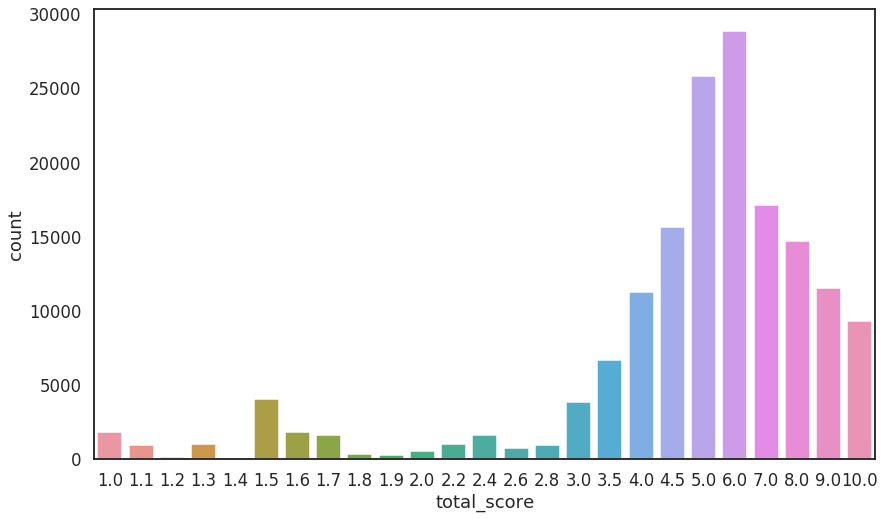

In [33]:
fig, ax = pyplot.subplots(figsize=plot_dims)
sns.countplot(x='total_score', data=total_score)


In [36]:
organic = df.select('Selected Certifications and Seals').toPandas()
organic

,Selected Certifications and Seals
0,[USDA Organic]
1,[USDA Organic]
2,[USDA Organic]
3,[USDA Organic]
4,[USDA Organic]
...,...
161793,None
161794,None
161795,None
161796,None


In [42]:
a = organic['Selected Certifications and Seals'].iloc[0]

In [50]:
organic['Selected Certifications and Seals'] = organic['Selected Certifications and Seals'].apply(lambda x: ','.join(x) if x else None)
organic.head()

,Selected Certifications and Seals
0,USDA Organic
1,USDA Organic
2,USDA Organic
3,USDA Organic
4,USDA Organic


In [51]:
organic['Selected Certifications and Seals'].value_counts()

USDA Organic                                                                          13923
PETA Cruelty-free Companies                                                            2681
PETA Cruelty-free Companies,USDA Organic                                               1139
PETA Cruelty-free Companies,Whole Foods Market Eco-Scale Rated                         1071
Whole Foods Market Eco-Scale Rated,PETA Cruelty-free Companies                          831
PETA Cruelty-free Companies,PETA: Companies That Do Test on Animals                     783
Whole Foods Market Eco-Scale Rated,PETA Cruelty-free Companies,USDA Organic             722
USDA 70-95% Organic                                                                     409
PETA: Companies That Do Test on Animals                                                 328
Leaping Bunny                                                                           224
PETA Cruelty-free Companies,Whole Foods Market Eco-Scale Rated,USDA Organic     

### Organic Products
We see that around 14 thousand products are Organic certified and 90% of the products have no Certifications or Seals
We can combine with Amazon data and analyze the value of adding these.

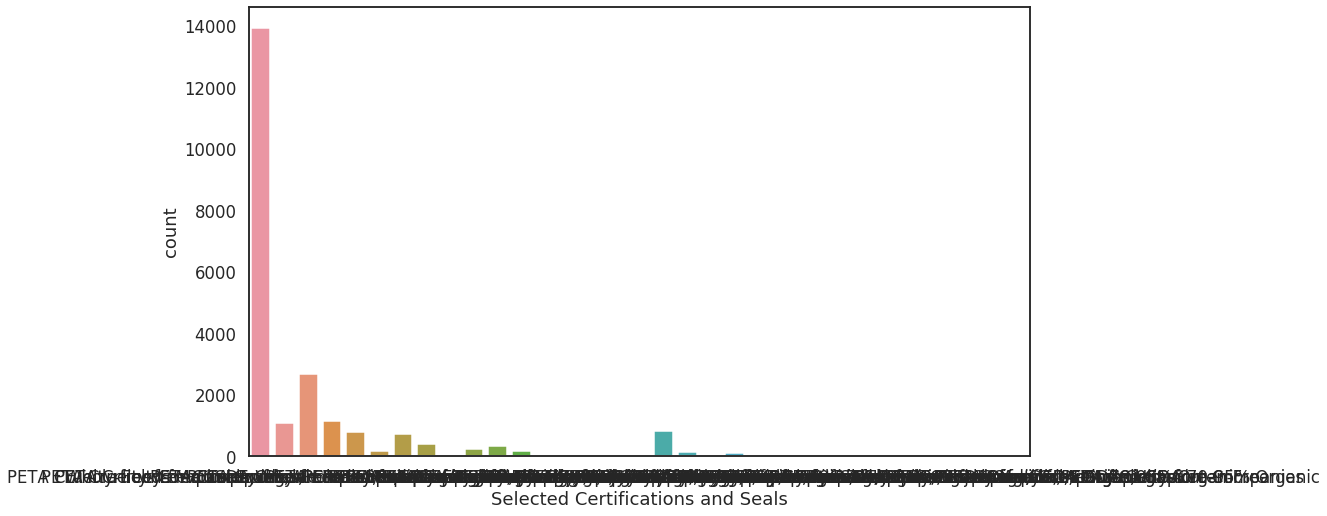

In [52]:
fig, ax = pyplot.subplots(figsize=plot_dims)
sns.countplot(x='Selected Certifications and Seals', data=organic)